In [1]:
sentences = [
    "오늘 날씨가 좋아서 나들이 가고 싶다.", # -> [오늘, 날씨가, 좋아서 ...]
    "이 영화는 정말 재미있었어요.",
    "맛있는 음식을 먹으러 갈까요?",
    "운동을 하면 건강에 좋아지는 것 같아요.",
    "공부하기 싫어서 미루고 있어요.",
    "여행 계획을 세우고 있는데 어디로 갈까요?",
    "좋은 책을 읽으면 마음이 편안해져요.",
    "오늘은 친구들과 만나서 재미있게 놀았어요.",
    "새로운 언어를 배우는 것은 어려워도 흥미로워요.",
    "주말에 가족들과 함께 시간을 보내기로 했습니다."
]
# [(0, '0.092*"것" + 0.090*"건강" + 0.090*"오늘" + 0.089*"운동" + 0.089*"친구"'),
#  (1, '0.073*"계획" + 0.073*"여행" + 0.073*"어디" + 0.073*"가족" + 0.073*"시간"'),
#  (2, '0.113*"것" + 0.113*"흥미" + 0.112*"언어" + 0.103*"음식" + 0.038*"공부"')]

In [2]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel # 주제어 확인

### 전처리(형태소 분석, 불용어 처리 등)

In [3]:
from mecab import MeCab
mecab = MeCab()
# 형태분석기 사용해 명사만 추출
morphs_list = list()
for sentence in sentences :
    morphs = mecab.nouns(sentence)
    morphs_list.append(morphs)
morphs_list

[['날씨', '나'],
 ['영화'],
 ['음식'],
 ['운동', '건강', '것'],
 ['공부'],
 ['여행', '계획', '어디'],
 ['책', '마음', '편안'],
 ['오늘', '친구'],
 ['언어', '것', '흥미'],
 ['주말', '가족', '시간']]

In [4]:
preprocessed_sentences = morphs_list

In [5]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

### transform with dictionary

In [6]:
# dictionary.token2id
dictionary.doc2bow(preprocessed_sentences[0])  # transform

[(0, 1), (1, 1)]

In [7]:
corpus_list = list()
for sentence in preprocessed_sentences:
    morphs_vector = dictionary.doc2bow(sentence)
    corpus_list.append(morphs_vector)
# corpus_list    

In [8]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3) # fix

In [9]:
lda_model.print_topics(num_words=5)

[(0, '0.099*"여행" + 0.099*"어디" + 0.098*"계획" + 0.095*"날씨" + 0.095*"나"'),
 (1, '0.116*"것" + 0.068*"건강" + 0.067*"운동" + 0.066*"흥미" + 0.066*"편안"'),
 (2, '0.120*"주말" + 0.120*"가족" + 0.120*"시간" + 0.044*"음식" + 0.043*"영화"')]

### 최적에 토픽 단어 수

In [12]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

0.7216927052681839

In [13]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-4.116945126246026

In [14]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(lda_model.log_perplexity(corpus_list))

In [18]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.722258,-3.933498
1,0.721693,-4.042007
2,0.723955,-4.223657
3,0.722598,-4.419894
4,0.722258,-4.429415
5,0.722501,-4.547442
6,0.722258,-4.640073
7,0.721693,-4.749879
8,0.723276,-4.782586


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\05-16\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\05-16\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

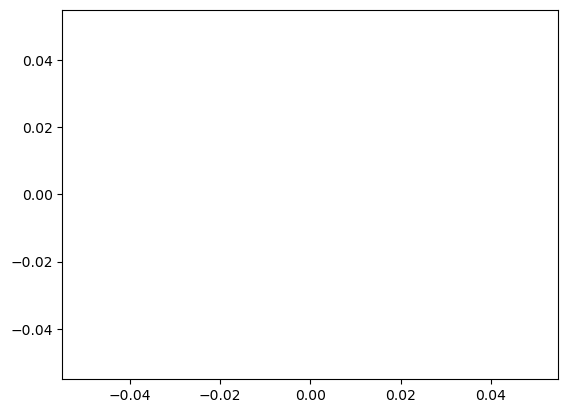

In [21]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()